Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

See if I can run this thing from Google CoLab, because Coursera server is unreliable and slow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/week1_PandasBasics

/content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/week1_PandasBasics


In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [0]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))


The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [0]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [6]:
# YOUR CODE GOES HERE
print("transactions Shape: " + str(transactions.shape))
print(str(transactions.head(4)))
print()
print()
print("items Shape: " + str(items.shape))
print(str(items.head(4)))
print()
print()
print("item_categories Shape: " + str(item_categories.shape))
print(str(item_categories.head(4)))
print()
print()
print("shops Shape: " + str(shops.shape))
print(str(shops.head(4)))
print()
print()

transactions Shape: (2935849, 6)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0


items Shape: (22170, 3)
                                           item_name  item_id  item_category_id
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1  !ABBYY FineReader 12 Professional Edition Full...        1                76
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2                40
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3                40


item_categories Shape: (84, 2)
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2  

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [7]:
# YOUR CODE GOES HERE

# ensure transaction date column is in the proper format
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')

# create a revenue column
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']

# make a new dataframe that only includes Sept 2014
trans2014sept = transactions.loc[:][(transactions['date'] >= pd.Timestamp(year=2014, month=9, day=1)) 
           & (transactions['date'] < pd.Timestamp(year=2014, month=10, day=1))]

# group by shop_id, summing the revenues, and find the max to submit
max_revenue = trans2014sept.groupby(['shop_id'])['revenue'].sum().max() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [8]:
# YOUR CODE GOES HERE

# make a new dataframe that only includes Summer 2014
trans2014summer = transactions.loc[:][(transactions['date'] >= pd.Timestamp(year=2014, month=6, day=1)) 
           & (transactions['date'] < pd.Timestamp(year=2014, month=9, day=1))]

# use item_id and the items dataframe to create an item_category_id column in the summer dataframe
# don't need item name, so use right merge as items[items.columns[1:]]
t14s = pd.merge(trans2014summer, items[items.columns[1:]], how = 'left', on = 'item_id')

# group by item_category_id and sum the revenues
t14s_g = t14s.groupby(['item_category_id'])['revenue'].sum()
# convert to a dataframe with proper indexing
tx = t14s_g.to_frame().reset_index()
# find argmax index on revenue column, and use that with the reset index to find the proper category id
category_id_with_max_revenue = tx['item_category_id'][tx['revenue'].values.argmax()]   # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [27]:
# YOUR CODE GOES HERE

# assuming items are returned for same price as sold, we can ignore any negative item_cnt_day issues
# make a simple data frame with just the item_id and item_price columns, grouping by item_id and computing std of item_price:
id_stds = transactions.groupby(['item_id'])[['item_price']].std().rename(columns={'item_price': 'price_std'})

# we are looking for all items that have std = 0 for the prices of the different transactions
# items that only have 0 or 1 transaction give a std = NaN... 1 transaction = constant price, so we will count them
id_stds['price_std'].fillna(0, inplace=True)

# number of items with constant price is finally compututed 
# with .sum() function given the conditional that the price_std column element == 0
num_items_constant_price = (id_stds.price_std == 0).sum() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

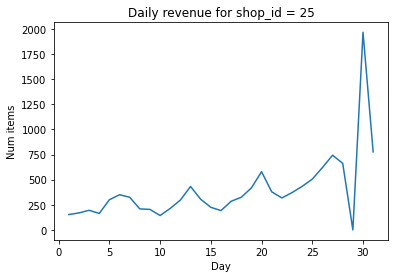

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [78]:
# any comments with 4 hashtags in front are how I think this assignment should be done
# but, I don't get the accepted answer unless I fudge things as done below

shop_id = 25

# get counts of total number of items sold each day, for shop 25, in Dec 2014
# note: this returns a dataframe with index of type "datetime"
shop25dec2014 = transactions.loc[:][(transactions['shop_id'] == shop_id)  
          & (transactions['date'] >= pd.Timestamp(year=2014, month=12, day=1)) 
          & (transactions['date'] < pd.Timestamp(year=2015, month=1, day=1))]. \
          groupby(['date'])[['item_cnt_day']].sum().  \
          rename(columns={'item_cnt_day': 'daily_total_items_sold'})

# because some days may have zero item_cnt_day values, that day will not be in the above dataframe
# to be sure I create a variance over ALL days in Dec 2014, I will combine the above dataframe with
#    one that has all 31 days in it, also using index of type "datetime" but day column is integer (for plotting)
# create the second dataframe with all 31 days of Dec 2014 in it:
days_df = pd.DataFrame(data={'days':list(range(1,32,1)), 'daily_total_items_sold': np.zeros(31)}, index = pd.date_range(start='12/1/2014', end='12/31/2014'))

# adding together the dataframes keeps the indexes matched, and missing days in the 
#    shop25dec2014 dataframe are matched with values of zero for number of items sold in the days_df dataframe
#    so the resultant value for that date is zero.  Otherwise, the resultant value is the sum of items sold (+ 0)
shop25dec2014all = days_df.add(shop25dec2014, fill_value=0)

# Plot it
plt.plot(shop25dec2014all.days, shop25dec2014all.daily_total_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

# compute the variance of the column of interest:  (note, unbiased variance is default in pandas function)
####total_num_items_sold_var = shop25dec2014all.loc[:,"daily_total_items_sold"].var()  # PUT YOUR ANSWER IN THIS VARIABLE
#### #Current answer for task total_num_items_sold_var is: 118646.84516129032


# grader doesn't like this variance, so let's try again, without adding in days with zero sales:
total_num_items_sold_var = shop25dec2014.loc[:,"daily_total_items_sold"].var()
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)
# Current answer for task total_num_items_sold_var is: 117167.70229885059   <--- Coursera likes this answer

## **New Question 4 instructions that appeared after I started working on this notebook:**


<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [79]:
STUDENT_EMAIL = "gaidis@alum.mit.edu" # EMAIL HERE
STUDENT_TOKEN = "Iw6W5bpDzqvqMUDM" # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [80]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)